<center>
    <h1><b>Feed Forward Neural Networks for Natural Language Processing<b></h1>
</center>

In [1]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

dataset_base_filepath = '../Data/Raw' # "/kaggle/input/ai-2-deep-learning-for-nlp-homework-1"
images_base_filepath = '../imgs' # "/kaggle/input/images"

# Load all the dataset files using pandas and store inside some dataframe variables
train_df = pd.read_csv(f'{dataset_base_filepath}/train_dataset.csv')
val_df = pd.read_csv(f'{dataset_base_filepath}/val_dataset.csv')
test_df = pd.read_csv(f'{dataset_base_filepath}/test_dataset.csv')

# Reduce the data sizes
size=1
train_df = train_df.sample(frac=size)
val_df = val_df.sample(frac=size)
# test_df = test_df.sample(frac=size)

print(train_df.shape, val_df.shape, test_df.shape)

(148388, 3) (42396, 3) (21199, 2)


In [2]:
train_df.head()

,ID,Text,Label
95142,195978,Probably my last country concert in NC!,0
137908,169959,Im scard jenis mum jst pt 0n a l0w cut t0p ad ...,0
46149,199037,its damn freezing. and i think im getting tons...,0
19242,108732,"Yaay, got my lappy charger back",1
112489,88814,@ThisStarChild hope yer ok hunny,0


In [3]:
import os
import re
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
import contractions

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

!unzip -o /home/antonis/nltk_data/corpora/wordnet.zip -d /home/antonis/nltk_data/corpora/

def clean_text(text: str) -> str:
    text = text.lower() # Convert to lowercase
    text = contractions.fix(text) # Expand contractions
    text = re.sub(r"http\S+|www\S+|https\S+", "", text) # Remove url links
    text = re.sub(r"@\w+", "", text) # Remove mentions
    text = re.sub(r"#(\w+)", "", text) # Remove hastags
    text = re.sub(r"(?<!\.)\.(?!\.)|[^\w\s\?\!]", "", text)
    text = re.sub(r"\.\.\.", " ... ", text)  # Ensure '...' is treated as a single token
    
    text = re.sub(r"&[^;\s]+;", "", text) # Remove special characters
    text = re.sub(r"\s+", " ", text) # Remove extra spaces
    
    text = re.sub(r"\d+", "", text)
    
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words] # Apply stemming
    lemmatized_words = [lemmatizer.lemmatize(word) for word in stemmed_words] # Apply lemmatization
    text = " ".join(lemmatized_words)
    
    return text

Archive:  /home/antonis/nltk_data/corpora/wordnet.zip
  inflating: /home/antonis/nltk_data/corpora/wordnet/lexnames  
  inflating: /home/antonis/nltk_data/corpora/wordnet/data.verb  
  inflating: /home/antonis/nltk_data/corpora/wordnet/index.adv  
  inflating: /home/antonis/nltk_data/corpora/wordnet/adv.exc  
  inflating: /home/antonis/nltk_data/corpora/wordnet/index.verb  
  inflating: /home/antonis/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /home/antonis/nltk_data/corpora/wordnet/data.adj  
  inflating: /home/antonis/nltk_data/corpora/wordnet/index.adj  
  inflating: /home/antonis/nltk_data/corpora/wordnet/LICENSE  
  inflating: /home/antonis/nltk_data/corpora/wordnet/citation.bib  
  inflating: /home/antonis/nltk_data/corpora/wordnet/noun.exc  
  inflating: /home/antonis/nltk_data/corpora/wordnet/verb.exc  
  inflating: /home/antonis/nltk_data/corpora/wordnet/README  
  inflating: /home/antonis/nltk_data/corpora/wordnet/index.sense  

[nltk_data] Downloading package wordnet to /home/antonis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/antonis/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/antonis/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!



  inflating: /home/antonis/nltk_data/corpora/wordnet/data.noun  
  inflating: /home/antonis/nltk_data/corpora/wordnet/data.adv  
  inflating: /home/antonis/nltk_data/corpora/wordnet/index.noun  
  inflating: /home/antonis/nltk_data/corpora/wordnet/adj.exc  


In [4]:
import time

# Apply the cleaning function to every dataset file and create a new column with the modified text
start_time = time.time()
train_df["Cleaned_text"] = train_df["Text"].apply(clean_text)
val_df["Cleaned_text"] = val_df["Text"].apply(clean_text)
test_df["Cleaned_text"] = test_df["Text"].apply(clean_text)
end_time = time.time()

print(f"Datasets were cleaned in {end_time - start_time} seconds.")

train_df.head(10)

Datasets were cleaned in 39.751715898513794 seconds.


,ID,Text,Label,Cleaned_text
95142,195978,Probably my last country concert in NC!,0,probabl my last countri concert in nc!
137908,169959,Im scard jenis mum jst pt 0n a l0w cut t0p ad ...,0,i am scard jeni mum jst pt n a lw cut tp ad sa...
46149,199037,its damn freezing. and i think im getting tons...,0,it damn freez and i think i am get tonsil like...
19242,108732,"Yaay, got my lappy charger back",1,yaay got my lappi charger back
112489,88814,@ThisStarChild hope yer ok hunny,0,hope yer ok hunni
108,192640,Planting Lilac trees at my bosses- Bartering f...,1,plant lilac tree at my bos barter for a round ...
81418,193688,"Fudge, maths tomorrow",0,fudg math tomorrow
24410,162991,Hope it syncs with my ipod or back to outlook ...,0,hope it sync with my ipod or back to outlook e...
78150,74871,When the 400km train get's introduced in SKore...,1,when the km train get introduc in skoreath km ...
45254,39197,horrible mood going to bed...hopefully it'll ...,0,horribl mood go to bedhop it will all go away ...


In [5]:
import nltk
from nltk import data
from nltk.tokenize import word_tokenize
import time

warnings.filterwarnings("ignore", category=UserWarning, module="nltk")

def remove_stopwords(text: str) -> str:
    # Remove the stopwords from the original text
    stop_words = set(
        ["i", "to", "the", "is", "a", "you", "my", "and", 
         "it", "am", "for", "in", "of", "that", "on", "so", "me"]
    )
    word_tokens = word_tokenize(text)
    filtered_words = [word for word in word_tokens if word not in stop_words]

    return " ".join(filtered_words)

start_time = time.time()
train_df['Cleaned_text'] = train_df['Cleaned_text'].apply(remove_stopwords)
val_df['Cleaned_text'] = val_df['Cleaned_text'].apply(remove_stopwords)
test_df['Cleaned_text'] = test_df['Cleaned_text'].apply(remove_stopwords)
end_time = time.time()


print(f"Stopwords were removed in {end_time - start_time} seconds.")

Stopwords were removed in 8.667080879211426 seconds.


In [6]:
# !wget http://nlp.stanford.edu/data/glove.6B.zip
# !unzip glove*.zip

In [156]:
import numpy as np

embeddings_dim = 300 # Can be 50, 100, 200, or 300

def load_glove(glove_path):
  embeddings = {}
  with open(glove_path, 'r', encoding='utf-8') as f:
    for line in f:
      values = line.split()
      word = values[0]
      vector = np.asarray(values[1:], dtype='float32')
      embeddings[word] = vector
      
  return embeddings

glove_path = f'glove.6B.{embeddings_dim}d.txt'
embeddings = load_glove(glove_path)

In [157]:
def get_w2v_dictionary(glove_path, num_words=22):
  dictionary = {}
  
  # Try to open the file and read the first num_words lines and store them in the dictionary
  try:
    with open(glove_path, 'r', encoding='utf-8') as f:
      for i, line in enumerate(f):
        if i >= num_words:
          break
        parts = line.strip().split()
        word = parts[0]
        vector = list(map(float, parts[1:]))
        dictionary[word] = f"[{', '.join(map(str, vector))}]"
        
  # Handle the case where the file cannot be opened or is not found
  except Exception as e:
    print(f"Error: File {glove_path} not found or cannot be opened.")
    
  return dictionary

# Read the contents of the glove file and store them in a dictionary
glove_path = f'glove.6B.{embeddings_dim}d.txt'
w2v_dictionary = get_w2v_dictionary(glove_path, num_words=22)

# Create a dataframe from the dictionary
w2v_df = pd.DataFrame.from_dict(w2v_dictionary, orient='index')
w2v_df.reset_index(inplace=True)
w2v_df.columns = ['Word', 'Vector']

w2v_df.head(10)

,Word,Vector
0,the,"[0.04656, 0.21318, -0.0074364, -0.45854, -0.03..."
1,",","[-0.25539, -0.25723, 0.13169, -0.042688, 0.218..."
2,.,"[-0.12559, 0.01363, 0.10306, -0.10123, 0.09812..."
3,of,"[-0.076947, -0.021211, 0.21271, -0.72232, -0.1..."
4,to,"[-0.25756, -0.057132, -0.6719, -0.38082, -0.36..."
5,and,"[0.038466, -0.039792, 0.082747, -0.38923, -0.2..."
6,in,"[-0.44399, 0.12817, -0.25247, -0.18582, -0.166..."
7,a,"[-0.29712, 0.094049, -0.096662, -0.344, -0.184..."
8,"""","[0.6947, 0.22184, 0.10526, 0.012382, -0.2558, ..."
9,'s,"[-0.001272, 0.36514, -0.077363, -0.26559, 0.17..."


In [158]:
# Find the most similar words to a given word

def find_most_similar_words(word, embeddings, top_n=5):
  if word not in embeddings:
    print(f"Word '{word}' not found in embeddings.")
    return []

  word_vector = embeddings[word]
  similarities = {}

  for other_word, other_vector in embeddings.items():
    if other_word != word:
      similarity = np.dot(word_vector, other_vector) / (np.linalg.norm(word_vector) * np.linalg.norm(other_vector))
      similarities[other_word] = similarity

  # Sort the words by similarity and return the top_n most similar words
  most_similar_words = sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:top_n]
  return most_similar_words

# Get the most similar words to "technology"
example_word = 'technology'
most_similar_words = find_most_similar_words(example_word, embeddings, top_n=10)

print(f'Most semantically similar to word {example_word}:')
print(f'\n{" "*5}word{" "*10}  similarity score')
print(f'{"="*43}')
for w in most_similar_words:
  print(f'{" "*5}{w[0]:15}{w[1]}')

Most semantically similar to word technology:

     word            similarity score
     technologies   0.778076708316803
     tech           0.6464561223983765
     technological  0.6369521617889404
     computer       0.6198545098304749
     science        0.6055578589439392
     engineering    0.6021392345428467
     innovation     0.5855401754379272
     research       0.5715996026992798
     industry       0.5703537464141846
     software       0.5702804923057556


In [159]:
# Calculate the semantics: word1 - word2 and word1 + word2
word1, word2 = 'apple', 'technology'

def euclidean_distance(v1, v2):
  return np.linalg.norm(v1 - v2)

def find_closest_word(target_vector, excluded_words, embeddings):
  min_distance = float('inf')
  closest_word = None
  for other_word, other_vector in embeddings.items():
    if other_word in excluded_words:
      continue
    current_distance = euclidean_distance(target_vector, other_vector)
    if current_distance < min_distance:
      min_distance = current_distance
      closest_word = other_word
  return closest_word

if word1 in embeddings and word2 in embeddings:
  word1_vector = embeddings[word1]
  word2_vector = embeddings[word2]

  # Calculate word1 - word2
  result_vector_minus = word1_vector - word2_vector
  closest_word_minus = find_closest_word(result_vector_minus, [word1, word2], embeddings)
  print(f'Closest word to {word1} - {word2} is: {closest_word_minus}')

  # Calculate word1 + word2
  result_vector_plus = word1_vector + word2_vector
  closest_word_plus = find_closest_word(result_vector_plus, [word1, word2], embeddings)
  print(f'Closest word to {word1} + {word2} is: {closest_word_plus}')

Closest word to apple - technology is: cherry
Closest word to apple + technology is: computer


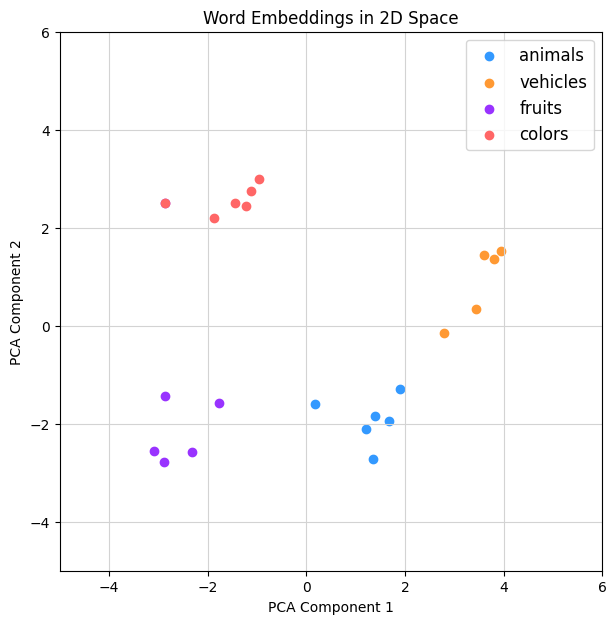

In [160]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_words_2d(categories, embeddings):
  all_vectors, colors, category_labels = [], [], []

  # Collect vectors, colors, and category labels
  for category in categories:
    words = category["items"]
    color = category["color"]
    label = category["category"]
    for word in words:
      if word in embeddings:
        all_vectors.append(embeddings[word])
        colors.append(color)
        category_labels.append(label)

  if not all_vectors:
    print("No valid words found in embeddings.")
    return

  # Perform PCA to reduce dimensionality to 2D
  pca = PCA(n_components=2)
  reduced_vectors = pca.fit_transform(np.array(all_vectors))

  # Plot the words in 2D space
  plt.figure(figsize=(7, 7))
  unique_categories = set(category_labels)
  for category in unique_categories:
    indices = [i for i, label in enumerate(category_labels) if label == category]
    plt.scatter(
      [reduced_vectors[i, 0] for i in indices],
      [reduced_vectors[i, 1] for i in indices],
      color=colors[indices[0]],  # Use the color of the first point in the category
      label=category
    )

  plt.title("Word Embeddings in 2D Space")
  plt.xlabel("PCA Component 1")
  plt.ylabel("PCA Component 2")
  plt.grid(color='lightgrey')
  plt.legend(loc='best', fontsize=12)
  plt.xlim(-5, 6)
  plt.ylim(-5, 6)
  
  plt.tight_layout
  plt.show()

# Example categories to plot
categories = [
  {"category": "fruits", "items": ["banana", "apple", "mango", "strawberry", "coconut", "orange"], "color": "#9933FF"},
  {"category": "animals", "items": ["dog", "cat", "lion", "tiger", "elephant", "zebra"], "color": "#3399FF"},
  {"category": "colors", "items": ["red", "blue", "green", "purple", "orange", "pink"], "color": "#FF6666"},
  {"category": "vehicles", "items": ["car", "bus", "train", "airplane", "bicycle"], "color": "#FF9933"}
]

# Plot the categories
plot_words_2d(categories, embeddings)


### Training Process

In [172]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

def tweet_to_vector(tokens, embeddings, embeddings_dim):
  vectors = []
  for token in tokens:
    if token in embeddings:
      vectors.append(embeddings[token])
    else:
      vectors.append(np.zeros(embeddings_dim))

  if len(vectors) == 0:
    return np.zeros(embeddings_dim)
  
  return np.mean(vectors, axis=0)


In [173]:
class TextDataset(Dataset):
  def __init__(self, texts, labels, embeddings, embeddings_dim):
    self.texts = texts
    self.labels = labels
    self.embeddings = embeddings
    self.embeddings_dim = embeddings_dim
    
  def __len__(self):
    return len(self.texts)
  
  def __getitem__(self, idx):
    text = self.texts[idx]
    label = self.labels[idx]
    vector = tweet_to_vector(text.split(), self.embeddings, self.embeddings_dim)
    return torch.tensor(vector, dtype=torch.float32), torch.tensor(label, dtype=torch.long)

In [174]:
class FeedForwardNN(nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim):
    super(FeedForwardNN, self).__init__()
    self.fc1 = nn.Linear(input_dim, hidden_dim)
    self.fc2 = nn.Linear(hidden_dim, output_dim)
    
  def forward(self, x):
    x = self.fc1(x)
    x = self.fc2(x)
    return x

In [175]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [176]:
# Transform the training and validation data into tensors
train_dataset = TextDataset(train_df['Cleaned_text'], train_df['Label'], embeddings, embeddings_dim)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

validation_dataset = TextDataset(val_df['Cleaned_text'], val_df['Label'], embeddings, embeddings_dim)
validation_loader = DataLoader(validation_dataset, batch_size=32, shuffle=False)

In [177]:
# Define hyperparameters
input_dim = embeddings_dim
hidden_dim = 128
output_dim = len(set(train_df['Label']))  # Number of unique labels

model = FeedForwardNN(input_dim, hidden_dim, output_dim).to(device)

epochs = 10
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [180]:
train_epoch_losses, val_epoch_losses = [], []
for epoch in range(epochs):
  batch_losses = []
  model.train()
  for X_batch, y_batch in train_loader:
    X_batch, y_batch = X_batch.to(device), y_batch.to(device)
    y_pred = model(X_batch)
    loss = criterion(y_pred, y_batch)
    batch_losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
  # Test the model on the validation set
  model.eval()
  with torch.no_grad():
    val_losses = []
    for X_val, y_val in validation_loader:
      X_val, y_val = X_val.to(device), y_val.to(device)
      y_val_pred = model(X_val)
      val_loss = criterion(y_val_pred, y_val)
      val_losses.append(val_loss.item())
  
  # Print the average loss for the epoch
  if epoch == 0 or epoch == epochs or epoch % (epochs/10) == 0:
    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {sum(batch_losses)/len(train_loader):.5f}", end=' ')
    print(f"Validation Loss: {sum(val_losses)/len(validation_loader):.5f}")
    
  train_epoch_losses.append(sum(batch_losses)/len(train_loader))
  val_epoch_losses.append(sum(val_losses)/len(validation_loader))

Epoch 1/10, Training Loss: 0.56693 Validation Loss: 0.56184
Epoch 2/10, Training Loss: 0.56554 Validation Loss: 0.55862
Epoch 3/10, Training Loss: 0.56473 Validation Loss: 0.55836
Epoch 4/10, Training Loss: 0.56410 Validation Loss: 0.55781
Epoch 5/10, Training Loss: 0.56361 Validation Loss: 0.55929
Epoch 6/10, Training Loss: 0.56356 Validation Loss: 0.56208
Epoch 7/10, Training Loss: 0.56307 Validation Loss: 0.55829
Epoch 8/10, Training Loss: 0.56288 Validation Loss: 0.55823
Epoch 9/10, Training Loss: 0.56306 Validation Loss: 0.55675
Epoch 10/10, Training Loss: 0.56267 Validation Loss: 0.55866


In [183]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

def evaluate_model(model, data_loader):
  model.eval()
  all_labels, all_preds = [], []
  
  with torch.no_grad():
    for X_batch, y_batch in data_loader:
      X_batch, y_batch = X_batch.to(device), y_batch.to(device)
      y_pred = model(X_batch)
      _, predicted = torch.max(y_pred, 1)
      all_labels.extend(y_batch.cpu().numpy())
      all_preds.extend(predicted.cpu().numpy())
  
  return all_labels, all_preds

# Evaluate the model on the validation set
val_labels, val_preds = evaluate_model(model, validation_loader)

# Calculate metrics
accuracy = accuracy_score(val_labels, val_preds)
precision = precision_score(val_labels, val_preds, average='weighted')
recall = recall_score(val_labels, val_preds, average='weighted')
f1 = f1_score(val_labels, val_preds, average='weighted')
print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Validation Precision: {precision:.4f}")
print(f"Validation Recall: {recall:.4f}")
print(f"Validation F1 Score: {f1:.4f}")

Validation Accuracy: 0.7120
Validation Precision: 0.7134
Validation Recall: 0.7120
Validation F1 Score: 0.7116


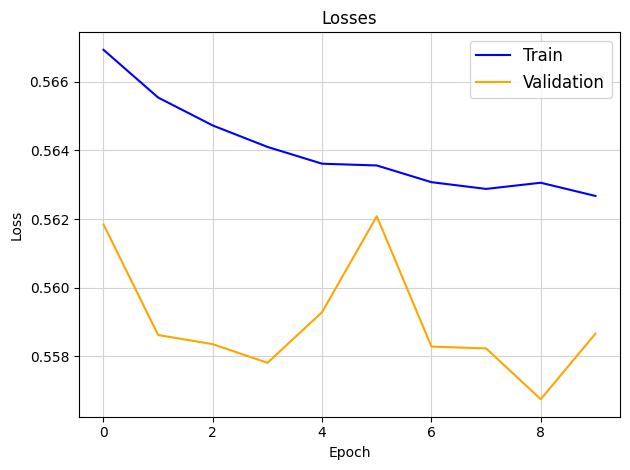

In [184]:
# Plot the losses
import matplotlib.pyplot as plt

plt.plot(train_epoch_losses, linestyle='-', color='blue', label='Train')
plt.plot(val_epoch_losses, linestyle='-', color='orange', label='Validation')
plt.title("Losses")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(color='lightgrey')

plt.legend(loc='best', fontsize=12)
plt.tight_layout()
plt.show()